Populating the interactive namespace from numpy and matplotlib


C:\Users\Aleksandr\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['solve']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


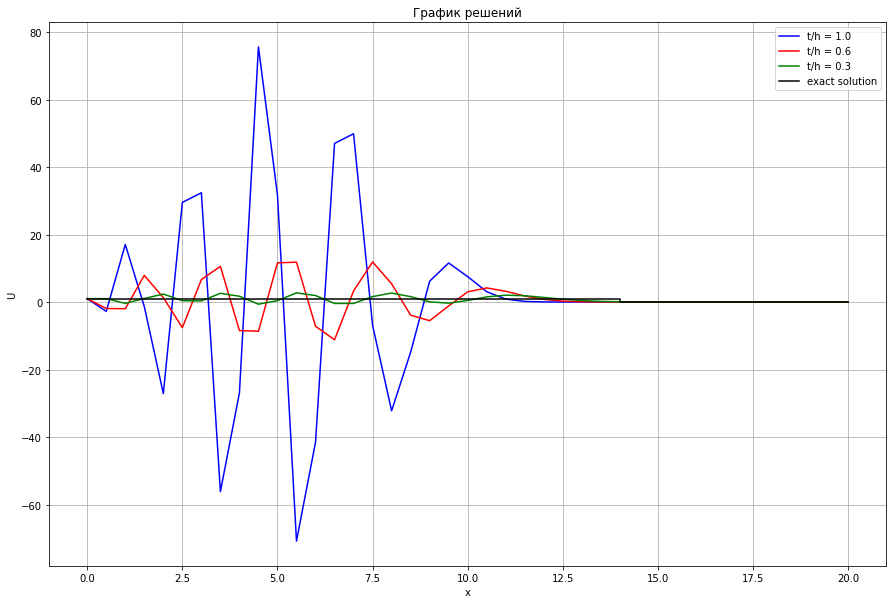

In [32]:
import numpy as np
import math as mt
import numpy.linalg as la
import sympy as sp
from matplotlib import pyplot as plt
from scipy.misc import derivative
%pylab inline

a = 1
T = 9
X = 20
exact_solution = np.zeros((2, 22))
for i in range (22):
    
    
    if (i < 15 ):
        exact_solution [ 0, i ] = i 
        exact_solution [ 1, i ] = 1
    else :
        exact_solution [ 0, i ] = i-1
        exact_solution [ 1, i ] = 0
        


def f1 (u, n, m, sigma  ):
    n = n+1
    return u[n, m] - sigma /2 *( u[n, m+1]- u[n, m-1])
def f2 (u, n, m, sigma ):
    n = n + 1
    return u[n, m]-sigma/2 * (u[ n, m+1 ] - u[n, m-1]) + sigma**2 /2 *( u[n, m+1] - 2*u[n, m] + u[n,m-1] )


def solve (sigma, h, f):
    t = h*sigma
    
    M = (int)( X/h ) + 1
    N = (int)( T/t ) + 1 
    u = np.zeros((N, M))
    for i in range (M) :
        if ( i*h < 5):
            u[N-1, i] = 1

    for  i in range (N): 
        u[i, 0] = 1
        u[i, M-1] = 0 # из н.у. через характристики

    A = [i for i in range(N-1)]

    for n in reversed( A ):
         for m  in range(1, M-1):
                u[n, m] = f(u, n, m, sigma )
    result = np.zeros((2, M))
    result [0, :] = np.linspace(0., X, M)
    result [1, :] = u[0, :]
    return result


plt.figure(figsize = (15, 10))
plt.title('График решений')
plt.grid()
plt.xlabel('x')
plt.ylabel('U')
result1 = solve ( 1.0, 0.5, f1  )
result2 = solve ( 0.6, 0.5, f1  )
result3 = solve ( 0.3, 0.5, f1  )

plt.plot(result1[0, :], result1[1, :],  c = 'blue',label = 't/h = 1.0')
plt.plot(result2[0, :], result2[1, :],  c = 'red',label = 't/h = 0.6')
plt.plot(result3[0, :], result3[1, :],  c = 'green',label = 't/h = 0.3')
plt.plot(exact_solution[0, :], exact_solution[1, :], c = 'black',label = 'exact solution')
plt.legend()


        

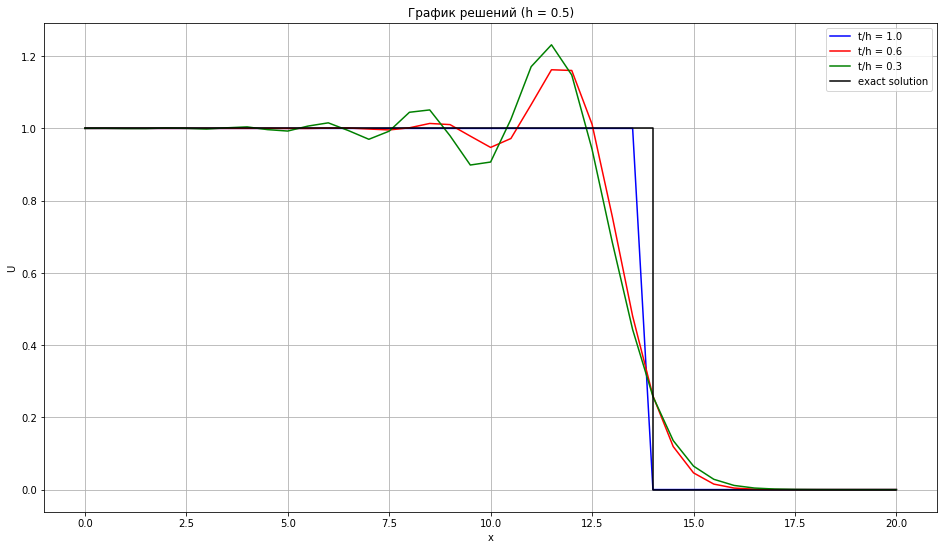

In [33]:

a = 1
T = 9
X = 20



plt.figure(figsize = (16, 9))
plt.title('График решений (h = 0.5)')
plt.grid()
plt.xlabel('x')
plt.ylabel('U')
result1 = solve ( 1.0, 0.5, f2 )
result2 = solve ( 0.6, 0.5, f2 )
result3 = solve ( 0.3, 0.5, f2 )


plt.plot(result1[0, :], result1[1, :], c = 'blue',label = 't/h = 1.0')
plt.plot(result2[0, :], result2[1, :], c = 'red',label = 't/h = 0.6')
plt.plot(result3[0, :], result3[1, :], c = 'green',label = 't/h = 0.3')
plt.plot(exact_solution[0, :], exact_solution[1, :], c = 'black',label = 'exact solution')
plt.legend()


        

No handles with labels found to put in legend.


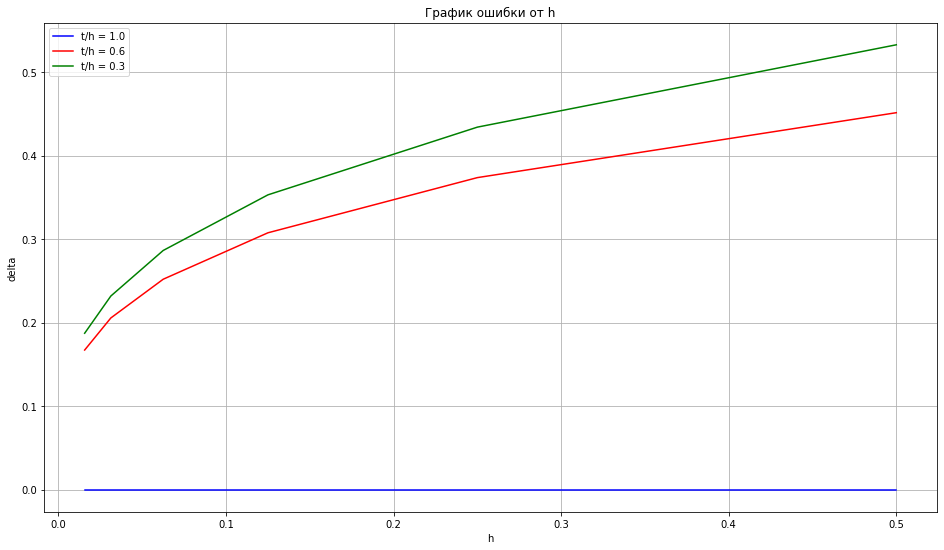

In [34]:
h =0.5

h_= np.zeros(6)
delta = np.zeros((3,6))
for  j in range (6):
    result1 = solve ( 1.0, h, f2 )
    result2 = solve ( 0.6, h, f2 )
    result3 = solve ( 0.3, h, f2 )
    for  i in range ( 1, (int)(X/h) ):
        if (result1[0, i] < 14 ):
            delta[0, j] += ( result1[1, i] - 1.0 )**2*h            
            delta[1, j] += ( result2[1, i] - 1.0 )**2*h
            delta[2, j] += ( result3[1, i] - 1.0 )**2*h
        if (result1[0, i] > 14):
            delta[0, j] += ( result1[1, i] - 0 )**2*h
            delta[1, j] += ( result2[1, i] - 0 )**2*h
            delta[2, j] += ( result3[1, i] - 0 )**2*h
    delta[0,j] = ( delta[0,j] )**0.5
    delta[1,j] = ( delta[1,j] )**0.5
    delta[2,j] = ( delta[2,j] )**0.5
    h_[j] = h
    h = h / 2
plt.figure(figsize = (16, 9)) 
plt.title('График ошибки от h')
plt.grid()
plt.xlabel('h')
plt.ylabel('delta')
plt.legend()
plt.plot(h_, delta[0,:] , c = 'blue',label = 't/h = 1.0')  
plt.plot(h_, delta[1,:] , c = 'red',label = 't/h = 0.6')
plt.plot(h_, delta[2,:] , c = 'green',label = 't/h = 0.3')
plt.legend()


    

No handles with labels found to put in legend.


<Figure size 1368x504 with 0 Axes>

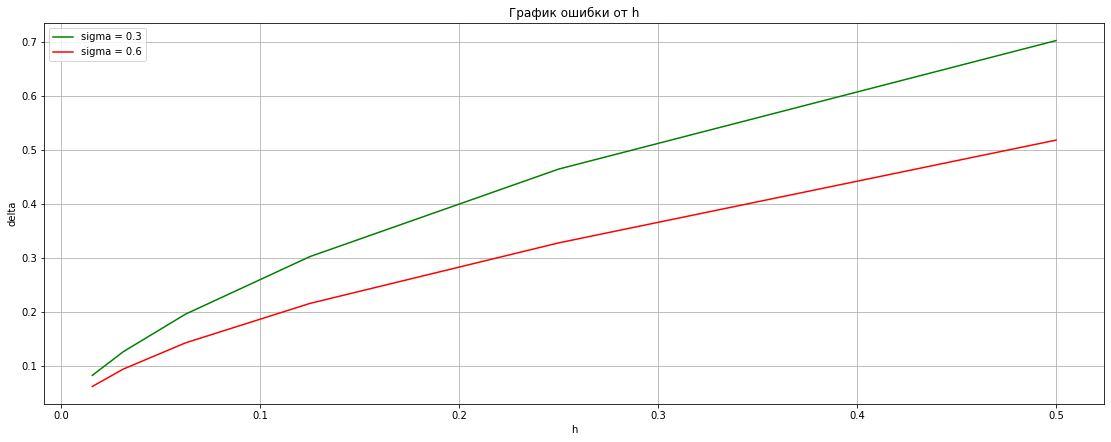

In [35]:
h = 0.5 

delta1 = np.zeros(6)
delta2 = np.zeros(6)
plt.figure(figsize = (19, 7))

for  j in range (6):
    
    result1 = solve ( 0.3, h, f2 )
    result2 = solve ( 0.6, h, f2 )
    
    for  i in range ( 1, (int)(X/h) ):
        
        if (( result1[1, i] - 1.0 ) < 0) and (result1[0, i] < 14 ):
             result1[1, i] = 1.0 + ( 1.0-result1[1, i] )
        if (( result1[1, i] ) < 0) and (result1[0, i] >= 14 ):
             result1[1, i] = -result1[1, i]
        
        if (( result2[1, i] - 1.0 ) < 0) and (result2[0, i] < 14 ):
             result2[1, i] = 1.0 + ( 1.0-result2[1, i] )
        if (( result2[1, i] ) < 0) and (result2[0, i] >= 14 ):
             result2[1, i] = -result2[1, i]

        
        if (result1[0, i] < 14) and (result1[0, i+1] < 14):
            delta1[j] += mt.fabs(( result1[1, i]+result1[1, i+1])/2 - 1.0 ) * h
            delta2[j] += mt.fabs(( result2[1, i]+result2[1, i+1])/2 - 1.0 ) * h
        
        if (result1[0, i] < 14) and (result1[0, i+1] > 14):
            delta1[j] += mt.fabs(( result1[1, i] + 1 + (1 - result1[1, i+1]) ) /2 - 1.0 ) * h
            delta2[j] += mt.fabs(( result2[1, i] + 1 + (1 - result2[1, i+1]) ) /2 - 1.0 ) * h
            
        if (result1[0, i] >= 14) :
            delta1[j] += ( result1[1, i] + result1[1, i+1] ) * h / 2
            delta2[j] += ( result2[1, i] + result2[1, i+1] ) * h / 2
    h_[j] = h 
    h = h / 2
# plt.plot(result[0, :], result[1, :], '-o', c = 'blue',label = 't/h = 1.0')
# plt.plot(exact_solution[0, :], exact_solution[1, :], c = 'black',label = 'exact solution')
plt.figure(figsize = (19, 7)) 
plt.title('График ошибки от h')
plt.grid()
plt.xlabel('h')
plt.ylabel('delta')
plt.legend()
plt.plot(h_, delta1, c = 'green',label = 'sigma = 0.3') 
plt.plot(h_, delta2, c = 'red',label = 'sigma = 0.6') 
plt.legend()


No handles with labels found to put in legend.


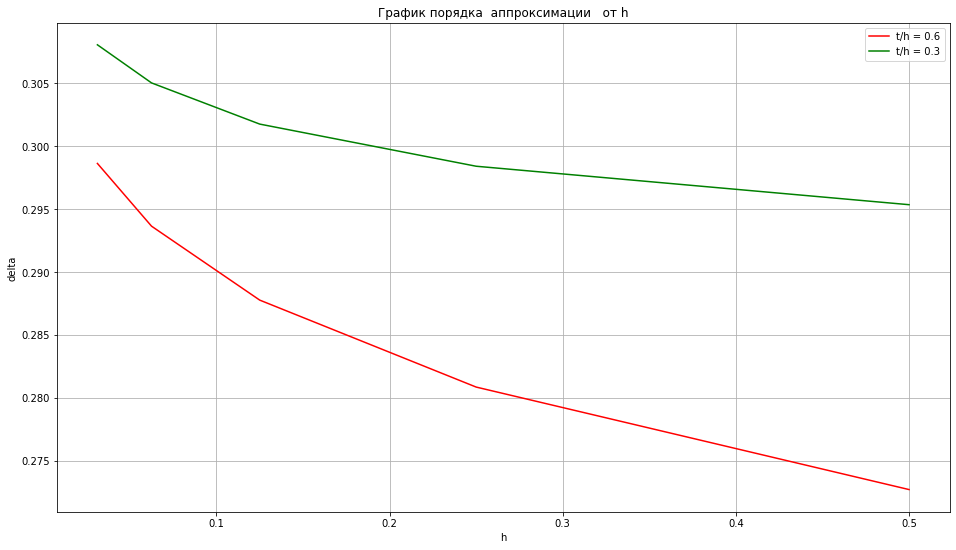

In [36]:
h =0.5

h_= np.zeros(6)
delta = np.zeros((3,6))
for  j in range (6):
    result1 = solve ( 1.0, h, f2 )
    result2 = solve ( 0.6, h, f2 )
    result3 = solve ( 0.3, h, f2 )
    for  i in range ( 1, (int)(X/h) ):
        if (result1[0, i] < 14 ):
            delta[0, j] += ( result1[1, i] - 1.0 )**2*h            
            delta[1, j] += ( result2[1, i] - 1.0 )**2*h
            delta[2, j] += ( result3[1, i] - 1.0 )**2*h
        if (result1[0, i] > 14):
            delta[0, j] += ( result1[1, i] - 0 )**2*h
            delta[1, j] += ( result2[1, i] - 0 )**2*h
            delta[2, j] += ( result3[1, i] - 0 )**2*h
    delta[0,j] = ( delta[0,j] )**0.5
    delta[1,j] = ( delta[1,j] )**0.5
    delta[2,j] = ( delta[2,j] )**0.5
    h_[j] = h
    h = h / 2
    
grade2 = np.zeros(5)
grade3 = np.zeros(5)
h= 0.5
h_ = np.zeros(5)
for i in range(5):
    grade2[i] = mt.log2(delta[1,i]/delta[1,i+1])
    grade3[i] = mt.log2(delta[2,i]/delta[2,i+1]) 
    
    h_[i] = h
    h=h/2
plt.figure(figsize = (16, 9)) 
plt.title('График порядка  аппроксимации   от h')
plt.grid()
plt.xlabel('h')
plt.ylabel('delta')
plt.legend()
plt.plot(h_, grade2 , c = 'red',label = 't/h = 0.6')  
plt.plot(h_, grade3 , c = 'green',label = 't/h = 0.3') 
plt.legend()


    

No handles with labels found to put in legend.


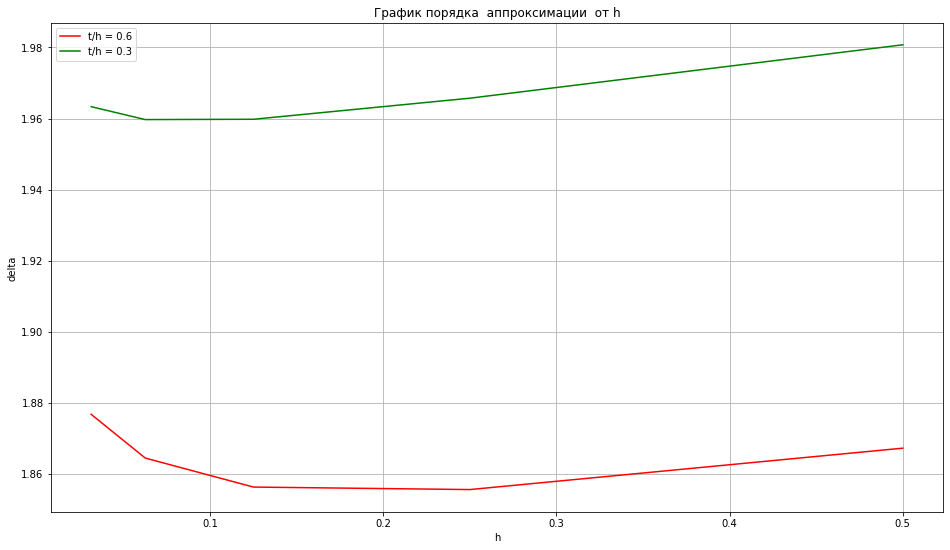

In [37]:
h =0.5

h_= np.zeros(5)
# delta = np.zeros((3,5))
delta_ = np.zeros((3,5))
for  j in range (5):
 
    
    result2 = solve ( 0.6, h, f2 )
    result3 = solve ( 0.3, h, f2 )
        
    result_2 = solve ( 0.6, h/2, f2 )
    result_3 = solve ( 0.3, h/2, f2 )
 
    
    for  i in range ( 1, (int)(X/h) ):
        if (result_2[0, i] < 14 ):
                      
#             delta[1, j] += ( result2[1, i] - 1.0 )**2*h
#             delta[2, j] += ( result3[1, i] - 1.0 )**2*h
            
            delta_[1, j] += ( result_2[1, 2*i] -  result2[1, i] )**2*h*2
            delta_[2, j] += ( result_3[1, 2*i] -  result3[1, i] )**2*h*2
            
        if (result_2[0, i] > 14):
        
#             delta[1, j] += ( result2[1, i] - 0 )**2*h
#             delta[2, j] += ( result3[1, i] - 0 )**2*h
            
            delta_[1, j] += ( result_2[1, 2*i] -  result2[1, i] )**2*h*2
            delta_[2, j] += ( result_3[1, 2*i] -  result3[1, i] )**2*h*2
            

#     delta[1,j] = ( delta[1,j] )**0.5
#     delta[2,j] = ( delta[2,j] )**0.5
    
    delta_[1,j] = ( delta_[1,j] )**0.5
    delta_[2,j] = ( delta_[2,j] )**0.5
    h = h / 2
#     delta_[1,j] = ( delta_[1,j] )*2
#     delta_[2,j] = ( delta_[2,j] )*2
    

grade2 = np.zeros(5)
grade3 = np.zeros(5)
h= 0.5
h_ = np.zeros(5)
for i in range(5):
    grade2[i] = mt.log2(1 + 2 * delta_[1, i]/delta[1,i+1] )
    grade3[i] = mt.log2(1 + 2 * delta_[2, i]/delta[2,i+1] ) 
    
    h_[i] = h
    h=h/2
plt.figure(figsize = (16, 9)) 
plt.title('График порядка  аппроксимации  от h')
plt.grid()
plt.xlabel('h')
plt.ylabel('delta')
plt.legend()
plt.plot(h_, grade2 , c = 'red',label = 't/h = 0.6')  
plt.plot(h_, grade3 , c = 'green',label = 't/h = 0.3') 
plt.legend()

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, 'U')

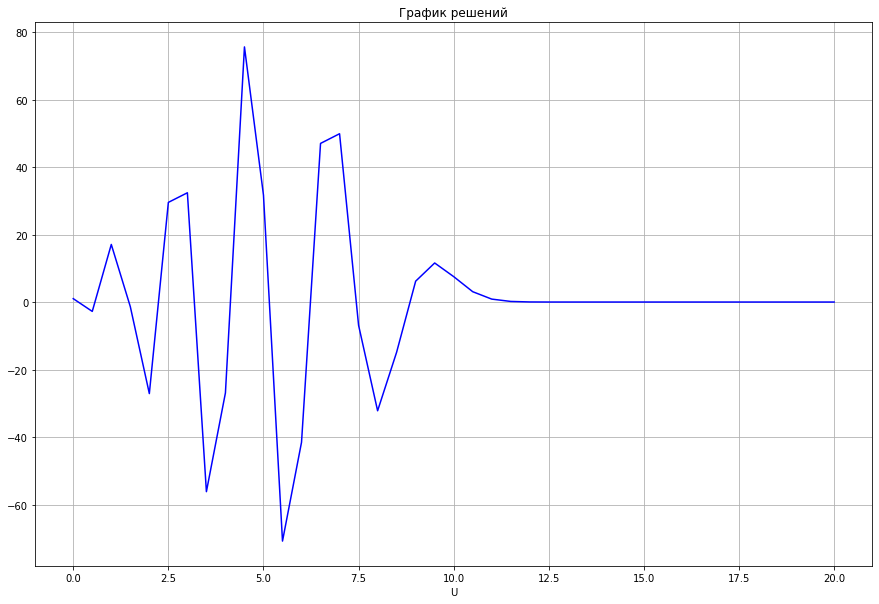

In [26]:
import numpy as np
import math
import numpy.linalg as la
import sympy as sp
from matplotlib import pyplot as plt
from scipy.misc import derivative
%pylab inline
sigma = 1
h = 0.5
t = h*sigma1
a = 1
T = 9
X = 20
M = (int)( X/h ) + 1
N = (int)( T/t ) + 1 
u = np.zeros((N, M))

def f1 ( n, m ):
    n = n+1
    return u[n, m] - sigma /2 *( u[n, m+1]- u[n, m-1])

for i in range (M) :
    if ( i*h < 5):
        u[N-1, i] = 1
        
for  i in range (N): 
    u[i, 0] = 1
    u[i, M-1] = 0 # из н.у. через характристики
    
A = [i for i in range(N-1)]

for n in reversed( A ):
     for m  in range(1, M-1):
            u[n, m] = f1( n, m )
        
plt.figure(figsize = (15, 10))
time = np.linspace(0., X, M)
plt.plot(time, u[0, :], c = 'blue', label = 't/h = 0.3')

plt.title('График решений')
plt.grid()
plt.xlabel('x')
plt.xlabel('U')
        



    

In [ ]:
h =0.5
sigma = 0.3
delta = np.zeros(3)
for  j in range (3):
    
    result = solve ( sigma, h, f2 )
    
    for  i in range ( 1, (int)(X/h) ):
        if (result[0, i] < 15 ):
            
            delta[j] += ( result[1, i] - 1.0 )**2
        if (result[0, i] > 15):
            delta[j] += ( result[1, i] - 0 )**2
    print(delta[j])
    delta[j] = ( delta[j]  / ((int)(X/h)-1) )**0.5
    print(delta[j])
    h = h / 2
  

print((delta[0]/delta[1])) 
print((delta[1]/delta[2])) 
    

Populating the interactive namespace from numpy and matplotlib


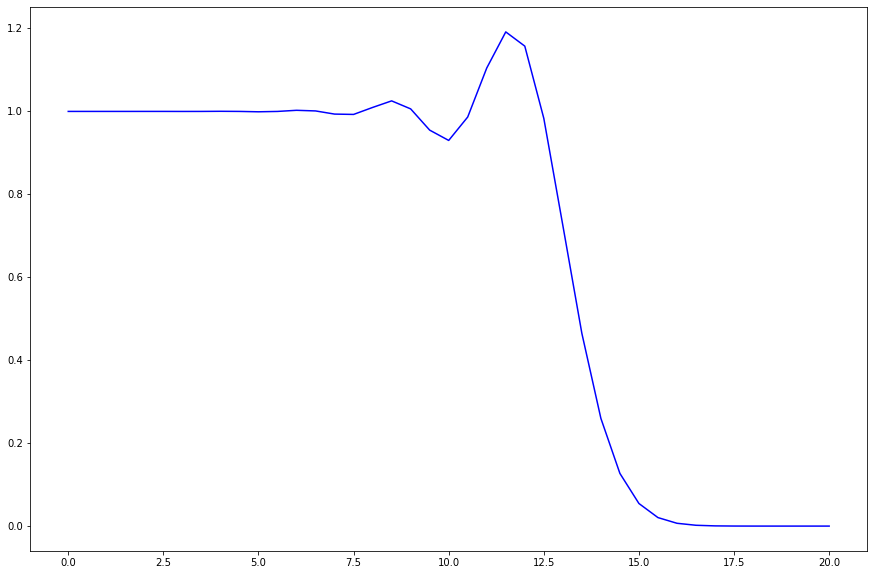

In [33]:
import numpy as np
import math
import numpy.linalg as la
import sympy as sp
from matplotlib import pyplot as plt
from scipy.misc import derivative
%pylab inline
sigma = 0.5
h = 0.5
t = h*sigma
a = 1
T = 9
X = 20
M = (int)( X/h ) + 1
N = (int)( T/t ) + 1 
u = np.zeros((N, M))

def f1 ( n, m ):
    n = n + 1
    return u[n, m] - sigma /2 *( u[n, m+1]- u[n, m-1])
def f2 ( n, m):
    n = n + 1
    return u[n, m]-sigma/2 * (u[ n, m+1 ] - u[n, m-1]) + sigma**2 /2 *( u[n, m+1] - 2*u[n, m] + u[n,m-1] )
for i in range (M) :
    if ( i*h < 5):
        u[N-1, i] = 1
        
for  i in range (N): 
    u[i, 0] = 1
    u[i, M-1] = 0 # из н.у. через характристики
    
A = [i for i in range(N-1)]

for n in reversed( A ):
     for m  in range(1, M-1):
            u[n, m] = f2( n, m )
        
plt.figure(figsize = (15, 10))
time = np.linspace(0., X, M)
plt.plot(time, u[0, :], c = 'blue')
        

In [59]:
mt.log2(2)

1.0

In [3]:
import numpy as np
import math as mt
import numpy.linalg as la
import sympy as sp
from matplotlib import pyplot as plt
from scipy.misc import derivative
S = 1
N = 1
K = 2/(N+1)/(N+2)
while ( K*S < 7/3):
    N = N + 1
    S = 0
    for i in range(N+1):
        S = S + ( N - i + 1 )*i
    K = 2/( N + 1 )/( N + 2 )
K*S

2.6666666666666665

In [19]:
n = int(input())
a = list(map(float,input().split()))
for i in range (n):
    a[i]=a[i]**2
q = int(input())
l = []
r = []
for i in range(q):
    b = list(map(int,input().split()))
    l.append(int(b[0]))
    r.append(int(b[1]))
for i in range(q):
    s = 0
    for  j in range ((l[i]), (r[i])+1):
        s = s + a[j]
    print((s/(r[i]-l[i]+1))**0.5)

8
79.02 36.68 79.83 76.00 95.48 48.84 49.95 91.91
3
0 0
0 1
0 2
79.02
61.60187821811929
68.2212374069346
